In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/CMMD_clean.csv')
df.head()

,ID,right,age,abnormality,classification
0,0001R,1,44,calcification,benign
1,0002L,0,40,calcification,benign
2,0003L,0,39,calcification,benign
3,0004L,0,41,calcification,benign
4,0005R,1,42,calcification,benign


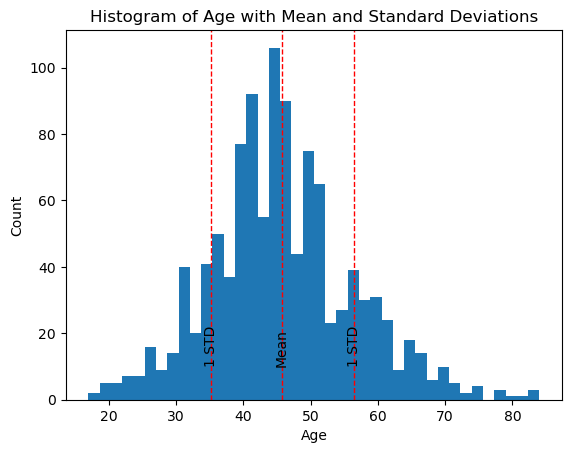

In [3]:
# Calculate mean and standard deviation of age column
mean_age = df['age'].mean()
std_age = df['age'].std()

# Create histogram of age column
plt.hist(df['age'], bins=40)

# Add line for the mean and labels for the standard deviations
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_age, 10, 'Mean', rotation=90, va='bottom', ha='center')
for i in range(1, 2):
    plt.axvline(mean_age + i * std_age, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(mean_age - i * std_age, color='r', linestyle='dashed', linewidth=1)
    plt.text(mean_age + i * std_age, 10, f'{i} STD', rotation=90, va='bottom', ha='center')
    plt.text(mean_age - i * std_age, 10, f'{i} STD', rotation=90, va='bottom', ha='center')

# Add axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Mean and Standard Deviations')

# Show the plot
plt.show()

In [4]:
print(df['age'].describe())

count    1107.000000
mean       45.773261
std        10.617554
min        17.000000
25%        39.000000
50%        45.000000
75%        52.000000
max        84.000000
Name: age, dtype: float64


In [5]:
if df.isnull().values.any():
    print("There are NaNs in the DataFrame.")
else:
    print("There are no NaNs in the DataFrame.")

There are no NaNs in the DataFrame.


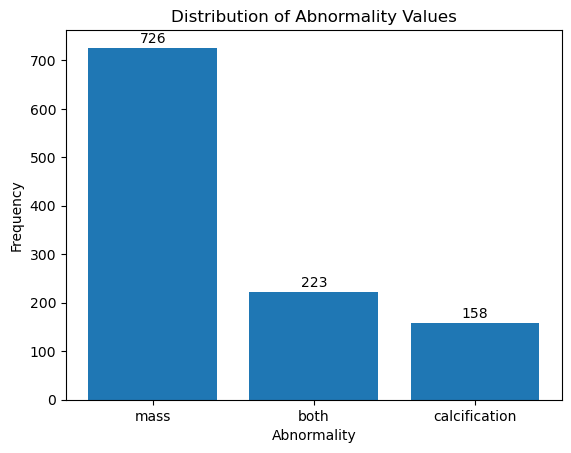

In [6]:
# Create a dictionary to count the frequency of each unique value in the 'abnormality' column
counts = df['abnormality'].value_counts().to_dict()

# Create a bar chart of the frequency counts
plt.bar(counts.keys(), counts.values())

# Add text labels with the frequency counts above each bar
for i, count in enumerate(counts.values()):
    plt.text(i, count + 10, str(count), ha='center')

# Add axis labels and title
plt.xlabel('Abnormality')
plt.ylabel('Frequency')
plt.title('Distribution of Abnormality Values')

# Show the plot
plt.show()

In [16]:
# Count the frequency of each unique value in the 'classification' column
counts = df['classification'].value_counts()

# Calculate the total count
total_count = counts.sum()

# Calculate the proportion of 'benign' and 'malignant'
benign_prop = counts['benign'] / total_count
malignant_prop = counts['malignant'] / total_count

print(f"Proportion of 'benign': {benign_prop:.3f}")
print(f"Proportion of 'malignant': {malignant_prop:.3f}")


Proportion of 'benign': 0.491
Proportion of 'malignant': 0.509


In [7]:
# Find rows where both R and L are 0 or both R and L are 1
mask = ((df['R'] == 0) & (df['L'] == 0)) | ((df['R'] == 1) & (df['L'] == 1))
rows_with_both_R_L = df[mask]

# Check if there are any rows with both R and L the same
if rows_with_both_R_L.shape[0] > 0:
    print("There are rows with both R and L the same.")
else:
    print("There are no rows with both R and L the same.")

KeyError: 'R'

In [8]:
# One-hot encode the abnormality and classification columns
df_encoded = pd.get_dummies(df, columns=['abnormality', 'classification'])

# MinMax scale the age column
scaler = MinMaxScaler()
df_encoded['age'] = scaler.fit_transform(df_encoded[['age']])

# Show the encoded and scaled DataFrame
df_encoded.head()

,ID,right,age,abnormality_both,abnormality_calcification,abnormality_mass,classification_benign,classification_malignant
0,0001R,1,0.402985,0,1,0,1,0
1,0002L,0,0.343284,0,1,0,1,0
2,0003L,0,0.328358,0,1,0,1,0
3,0004L,0,0.358209,0,1,0,1,0
4,0005R,1,0.373134,0,1,0,1,0


In [9]:
# Rename columns to replace 'abnormality' with 'abnorm' and 'classification' with 'class'
df_encoded = df_encoded.rename(columns={'abnormality_both': 'abnorm_both',
                                        'abnormality_calcification': 'abnorm_calcification',
                                        'abnormality_mass': 'abnorm_mass',
                                        'classification_benign': 'class_benign',
                                        'classification_malignant': 'class_malignant'})

# Show the renamed DataFrame
df_encoded.head()


,ID,right,age,abnorm_both,abnorm_calcification,abnorm_mass,class_benign,class_malignant
0,0001R,1,0.402985,0,1,0,1,0
1,0002L,0,0.343284,0,1,0,1,0
2,0003L,0,0.328358,0,1,0,1,0
3,0004L,0,0.358209,0,1,0,1,0
4,0005R,1,0.373134,0,1,0,1,0


In [10]:
df_encoded = df_encoded.drop(['class_malignant'], axis=1)

In [12]:
df_encoded.to_csv('data/CMMD_encoded_scaled.csv', index=False)

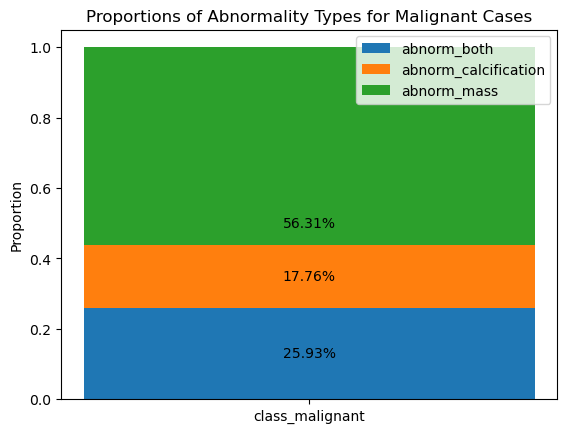

In [33]:
# Create a subset of the encoded DataFrame where 'class_malignant' is 1
df_malignant = df_encoded[df_encoded['class_malignant'] == 1]

# Calculate the proportions of each abnormality type where 'class_malignant' is 1
prop_both = df_malignant['abnorm_both'].sum() / df_malignant.shape[0]
prop_calc = df_malignant['abnorm_calcification'].sum() / df_malignant.shape[0]
prop_mass = df_malignant['abnorm_mass'].sum() / df_malignant.shape[0]

# Calculate the percentages
perc_both = prop_both * 100
perc_calc = prop_calc * 100
perc_mass = prop_mass * 100

# Create a stacked bar chart of the proportions
plt.bar(['class_malignant'], [prop_both], label='abnorm_both')
plt.bar(['class_malignant'], [prop_calc], bottom=[prop_both], label='abnorm_calcification')
plt.bar(['class_malignant'], [prop_mass], bottom=[prop_both + prop_calc], label='abnorm_mass')

# Add text labels for the percentages
plt.text(['class_malignant'], prop_both / 2, f'{perc_both:.2f}%', va='center', ha='center')
plt.text(['class_malignant'], (prop_both + prop_calc) * 0.8, f'{perc_calc:.2f}%', va='center', ha='center')
plt.text(['class_malignant'], (prop_both + prop_calc + prop_mass) / 2, f'{perc_mass:.2f}%', va='center', ha='center')

# Add axis labels and title
plt.ylabel('Proportion')
plt.title('Proportions of Abnormality Types for Malignant Cases')

# Add legend
plt.legend()

# Show the plot
plt.show()

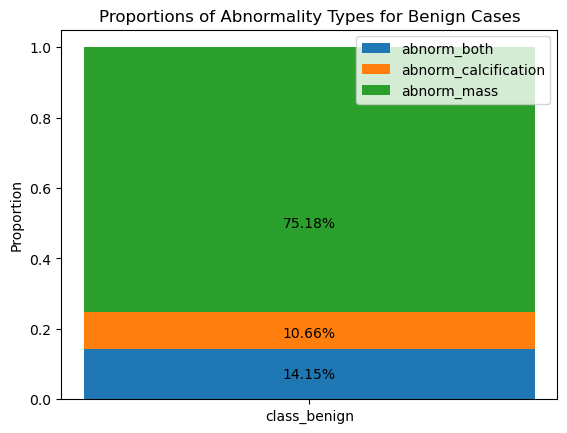

In [34]:
# Create a subset of the encoded DataFrame where 'class_benign' is 1
df_benign = df_encoded[df_encoded['class_benign'] == 1]

# Calculate the proportions of each abnormality type where 'class_benign' is 1
prop_both = df_benign['abnorm_both'].sum() / df_benign.shape[0]
prop_calc = df_benign['abnorm_calcification'].sum() / df_benign.shape[0]
prop_mass = df_benign['abnorm_mass'].sum() / df_benign.shape[0]

# Calculate the percentages
perc_both = prop_both * 100
perc_calc = prop_calc * 100
perc_mass = prop_mass * 100

# Create a stacked bar chart of the proportions
plt.bar(['class_benign'], [prop_both], label='abnorm_both')
plt.bar(['class_benign'], [prop_calc], bottom=[prop_both], label='abnorm_calcification')
plt.bar(['class_benign'], [prop_mass], bottom=[prop_both + prop_calc], label='abnorm_mass')

# Add text labels for the percentages
plt.text(['class_benign'], prop_both / 2, f'{perc_both:.2f}%', va='center', ha='center')
plt.text(['class_benign'], (prop_both + prop_calc) * 1.5 / 2, f'{perc_calc:.2f}%', va='center', ha='center')
plt.text(['class_benign'], (prop_both + prop_calc + prop_mass) / 2, f'{perc_mass:.2f}%', va='center', ha='center')

# Add axis labels and title
plt.ylabel('Proportion')
plt.title('Proportions of Abnormality Types for Benign Cases')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [42]:
# Create a subset of the dataframe with only age and class_malignant columns
df_age_malignant = df_encoded[['age', 'class_malignant']]

# Calculate the correlation coefficient and p-value between age and class_malignant
corr_age_malignant, p_value = pearsonr(df_age_malignant['age'], df_age_malignant['class_malignant'])

print(f'Correlation between age and class_malignant: {corr_age_malignant:.2f}')
print(f'P-value: {p_value:.2e}')

Correlation between age and class_malignant: 0.30
P-value: 4.27e-24


Based on the correlation coefficient of 0.30 and the p-value of 4.27e-24, there is a statistically significant positive correlation between age and class_malignant. The correlation coefficient of 0.30 indicates a moderate positive linear relationship between the two variables, while the small p-value indicates that it is very unlikely to observe such a strong correlation coefficient by chance if there was no true correlation between the variables in the population. Therefore, we can conclude that there is strong evidence to support the presence of a positive correlation between age and class_malignant.

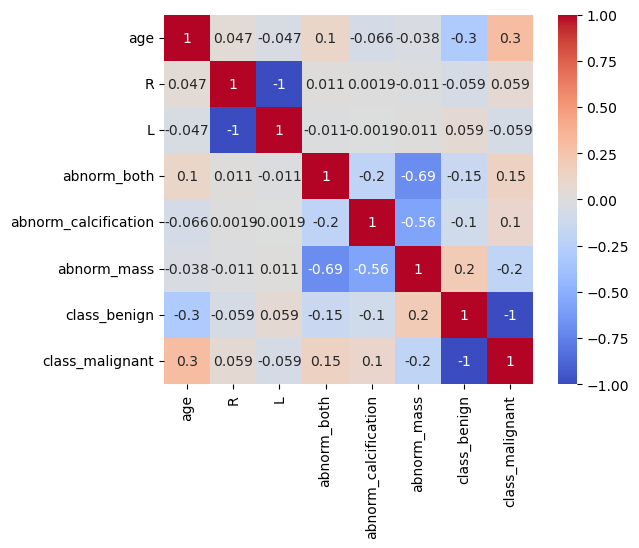

In [44]:
# Create a subset of the dataframe with the specified columns
df_subset = df_encoded[['age', 'R', 'L', 'abnorm_both', 'abnorm_calcification', 'abnorm_mass', 'class_benign', 'class_malignant']]

# Calculate the correlation coefficients between the columns
corr = df_subset.corr()

# Create a heatmap of the correlation coefficients
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()

In [58]:
df_encoded.head()

,ID,age,R,L,abnorm_both,abnorm_calcification,abnorm_mass,class_benign,class_malignant
0,0001-L,0.402985,0,1,0,1,0,1,0
1,0002-R,0.343284,1,0,0,1,0,1,0
2,0003-R,0.328358,1,0,0,1,0,1,0
3,0004-R,0.358209,1,0,0,1,0,1,0
4,0005-L,0.373134,0,1,0,1,0,1,0


In [62]:
# Create a subset of the dataframe with only age and class_malignant columns
df_age_malignant = df_encoded[['abnorm_calcification', 'class_malignant']]

# Calculate the correlation coefficient and p-value between age and class_malignant
corr_age_malignant, p_value = pearsonr(df_age_malignant['abnorm_calcification'], df_age_malignant['class_malignant'])

print(f'Correlation between calcification and malignant: {corr_age_malignant:.2f}')
print(f'P-value: {p_value:.2e}')

Correlation between calcification and malignant: 0.10
P-value: 7.22e-04


In [68]:
subset_R = df_encoded[df_encoded['R'] == 1]
prop_malignant_R = subset_R['class_malignant'].sum() / subset_R.shape[0]
print(f'Proportion of malignant cases for R: {prop_malignant_R:.2f}')

Proportion of malignant cases for R: 0.54


In [71]:
subset_L = df_encoded[df_encoded['L'] == 1]
prop_malignant_L = subset_L['class_malignant'].sum() / subset_L.shape[0]
print(f'Proportion of malignant cases for L: {prop_malignant_L:.2f}')

Proportion of malignant cases for L: 0.48


<Axes: xlabel='class_malignant', ylabel='age'>

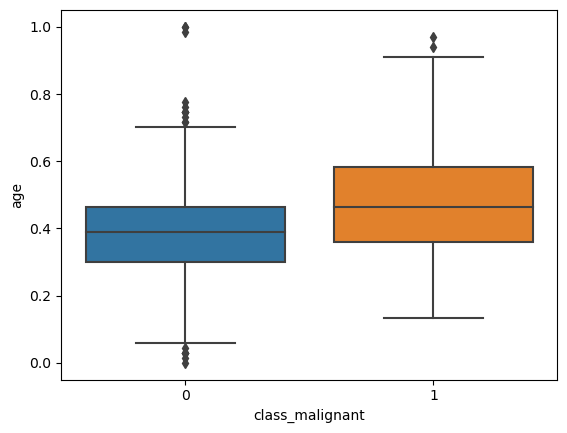

In [74]:
sns.boxplot(x="class_malignant", y="age", data=df_encoded)

These images & corresponding data rows were deleted due to foreign objects & glare in images.
- D1-0041 (both), D1-0517(both), D1-0772(both)


In [13]:
df = pd.read_csv('data/CMMD_encoded_scaled.csv')
df.head()

,ID,right,age,abnorm_both,abnorm_calcification,abnorm_mass,class_benign
0,0001R,1,0.402985,0,1,0,1
1,0002L,0,0.343284,0,1,0,1
2,0003L,0,0.328358,0,1,0,1
3,0004L,0,0.358209,0,1,0,1
4,0005R,1,0.373134,0,1,0,1


In [14]:
# create a boolean mask for the rows that meet the condition
mask = df['ID'].str.contains('0041|0517|0772')

# use the boolean mask to select the rows to delete and delete them
df = df.loc[~mask]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1104 non-null   object 
 1   right                 1104 non-null   int64  
 2   age                   1104 non-null   float64
 3   abnorm_both           1104 non-null   int64  
 4   abnorm_calcification  1104 non-null   int64  
 5   abnorm_mass           1104 non-null   int64  
 6   class_benign          1104 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 69.0+ KB


In [15]:
df.to_csv('data/CMMD_final.csv', index=False)